In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\spand\Downloads\retail_sales_dataset.csv")

In [5]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
df.isnull().sum()   #to check the missing values

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [27]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Adjust format as needed

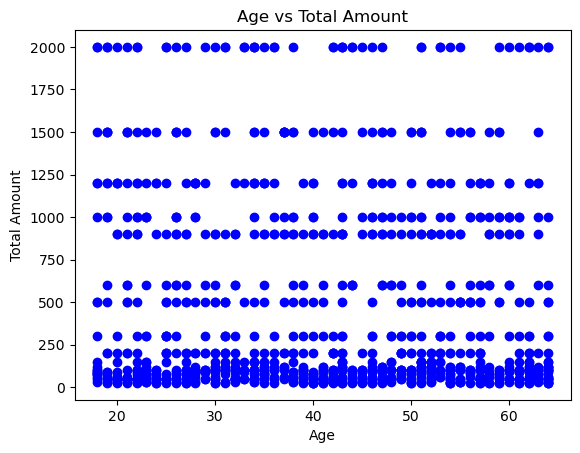

In [29]:
plt.scatter(df['Age'], df['Total Amount'], color='blue')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Age vs Total Amount')
plt.show()

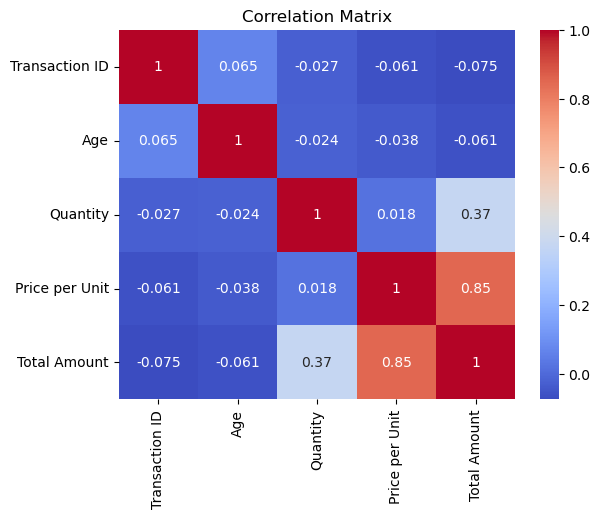

In [37]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
#prepare data
X = df[['Age']]  # Independent variable
y = df['Total Amount']  # Dependent variable

In [41]:
X

,Age
0,34
1,26
2,50
3,37
4,30
...,...
995,62
996,52
997,23
998,36


In [43]:
y

0       150
1      1000
2        30
3       500
4       100
       ... 
995      50
996      90
997     100
998     150
999     120
Name: Total Amount, Length: 1000, dtype: int64

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Total Amount']])

In [93]:
#split the data for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
#train the model
from sklearn.linear_model import LinearRegression

In [97]:
model = LinearRegression()  #This instance will be trained on the data to find the best-fit line.

In [99]:
model.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = model.predict(X_test)

In [103]:
y_pred

array([1500.,  100.,  300.,  100., 2000.,   90.,   50.,  300.,  200.,
       1000.,   75.,  100.,  600.,   30.,  300.,   60., 2000.,   60.,
         50., 1200.,  900.,  100., 1500.,   60., 1500.,   25.,   50.,
        900.,  200.,   75.,   25.,   30.,   75.,  100.,   25., 1500.,
        100.,   25.,   50.,  150.,  100., 1000., 1500.,  200.,  200.,
        100.,  300.,  300.,  600.,  600.,   50., 1000.,  120.,   30.,
        300., 1200.,   50.,  100.,  120.,  300., 1000.,  120.,  600.,
        200., 1000., 1500., 1200.,  500.,  100.,   25.,   75.,  200.,
        100., 2000.,   90.,  600.,   75.,   50.,  900., 1200.,  900.,
       1200.,  100.,  300.,  500.,  100.,  150.,  100.,  100.,  100.,
         90., 1500.,  300.,   90.,  900., 1200.,  200., 2000.,  100.,
        900.,  500., 1000.,  500., 2000., 1500.,  120.,  300.,   60.,
       1500.,   90.,  150.,  120., 1000.,  200.,  100.,  200.,   25.,
         25.,   90.,  900.,   50.,  150.,  500.,   50.,  500.,   50.,
        200.,   50.,

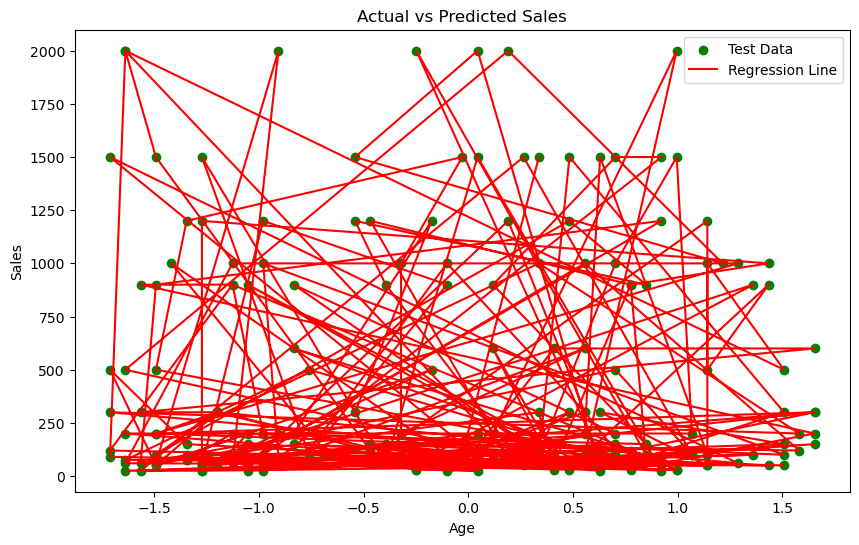

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Age_scaled'], y_test, color='green', label='Test Data')  # Test data
plt.plot(X_test['Age_scaled'], y_pred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Age')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [110]:
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Slope (m): 3.198796294231849e-14
Intercept (c): 456.0


In [112]:
# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results.head())  # Display the first few rows

   Actual  Predicted
0    1500     1500.0
1     100      100.0
2     300      300.0
3     100      100.0
4    2000     2000.0


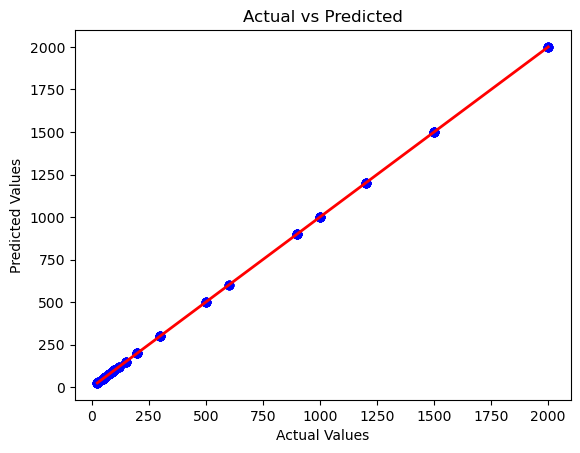

In [114]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()